In [110]:
###### import numpy as np
import pandas as pd
import os
import glob
from astropy.io import fits
#import emcee
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.time import Time
import lightkurve as lk
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [111]:
df = pd.read_csv('C:/Users/jojoa/GitHub/disperse/data/preliminary_results_Ca.csv')

In [112]:
df

,date,ew,ew_unc,int_wv,jd,qidx,star_name,time
0,2021-02-24,1.623713e+00,7.576443e-02,8542.0,2.459270e+06,8486.0,hat-p-67b,10:55:40
1,2021-02-24,1.757618e+00,2.770490e-02,8542.0,2.459270e+06,8486.0,hat-p-67b,11:04:43
2,2020-04-28,1.652571e+00,3.989906e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:10:31
3,2020-04-28,1.830325e+00,5.683004e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:16:12
4,2020-04-28,1.811466e+00,7.123256e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:21:53
5,2020-04-28,1.675132e+00,4.123308e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:27:34
6,2020-04-28,1.787543e+00,2.449742e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:33:15
7,2020-04-28,1.754112e+00,2.647121e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:38:57
8,2020-04-28,1.333085e+00,7.008093e-01,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:44:38
9,2020-04-28,1.755801e+00,2.011230e-02,8542.0,2.458968e+06,6437.0,HAT-P-67b_IN_1,06:50:19


In [113]:
df_star = df['star_name']

In [31]:
df_star[0]

'hat-p-67b'

In [40]:
df["star_name"] = df["star_name"].str.lower()

In [41]:
df_bool=df['ew']<0

In [42]:
(df.date.value_counts())

2020-06-15    18
2020-05-22    14
2020-04-28    14
2020-05-21     4
2020-05-20     4
2020-06-14     4
2020-06-18     4
2020-05-24     4
2020-05-23     4
2020-06-16     4
2020-04-29     4
2020-04-27     4
2020-06-13     3
2021-02-01     2
2021-02-24     2
2020-08-01     2
2021-03-04     2
2020-07-22     2
2021-01-31     2
2021-02-26     2
Name: date, dtype: int64

In [43]:
df['ew'].mean()

1.3428292915092898e+29

In [44]:
df.star_name.value_counts()

hat-p-67b_in_2             14
hat-p-67b_in_1             14
hat-p-67b                  10
hat-p-67b_out_same3         9
hat-p-67b_in_3              9
hat-p-67b_out_3_after1      4
hat-p-67                    4
hat-p-67b_out_2_after2      4
hat-p-67b_out_1_before1     4
hat-p-67b_out_3_after2      4
hat-p-67b_out_2_before1     4
hat-p-67b_out_3_before1     4
hat-p-67b_out_2_after1      4
hat-p-67b_out_1_after1      4
hat-p-67b_out_2_before2     4
hat-p-67b_out_3_before2     3
Name: star_name, dtype: int64

In [45]:
df_false = #df[36,38,44,46,63,97]

SyntaxError: invalid syntax (<ipython-input-45-cdd7c77b9bd7>, line 1)

In [46]:
pd.options.display.max_rows = 100

In [47]:
df.star_name.value_counts()

hat-p-67b_in_2             14
hat-p-67b_in_1             14
hat-p-67b                  10
hat-p-67b_out_same3         9
hat-p-67b_in_3              9
hat-p-67b_out_3_after1      4
hat-p-67                    4
hat-p-67b_out_2_after2      4
hat-p-67b_out_1_before1     4
hat-p-67b_out_3_after2      4
hat-p-67b_out_2_before1     4
hat-p-67b_out_3_before1     4
hat-p-67b_out_2_after1      4
hat-p-67b_out_1_after1      4
hat-p-67b_out_2_before2     4
hat-p-67b_out_3_before2     3
Name: star_name, dtype: int64

We retrieved the data for the planets from [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/)

In [48]:
target_name = 'hat-p-67b'
orbital_period = 4.81010250
t_c = 2455961.38467
t_c_btjd = t_c-2457000.0 #neg value means discovered before TESS

In [49]:
target_mask = df.star_name.str.contains(target_name)
df = df[target_mask]
keep_mask = df.ew_unc < 10 #original value = 1

In [51]:
df['ew']=df.ew.astype(np.float).values #change str to float
df['btjd']=df['jd']-2457000.0 #cut down JD to smaller scale

Let's compute the normalized phase shifted so that the transit midpoint always occurs at zero while also seeing the light curve before and after the midpoint.

$$\phi=\frac{\mod(t-T_c+\frac{P}{2}\;,P)}{P} -0.5$$ 

In [102]:
df['phase']=np.mod(df.btjd-t_c_btjd+(orbital_period*0.5),orbital_period)-0.5*orbital_period
df['normalized_phase']=(df['phase']/orbital_period) #centered at 0

In [107]:
df['in_transit']=np.abs(df.phase)<0.15
in_transit_mask=df['in_transit'].values


In [109]:
len(in_transit_mask)

63

In [52]:
sn_ratio=2
good_data_mask=(df.ew/df.ew_unc)>sn_ratio #signal to noise ratio

In [53]:
df=df[good_data_mask]

In [54]:
x_line=df['ew'].median() #calculate horizontal line going between in/out of transit points
x_line

1.729409992947749

(0.7, 1.2)

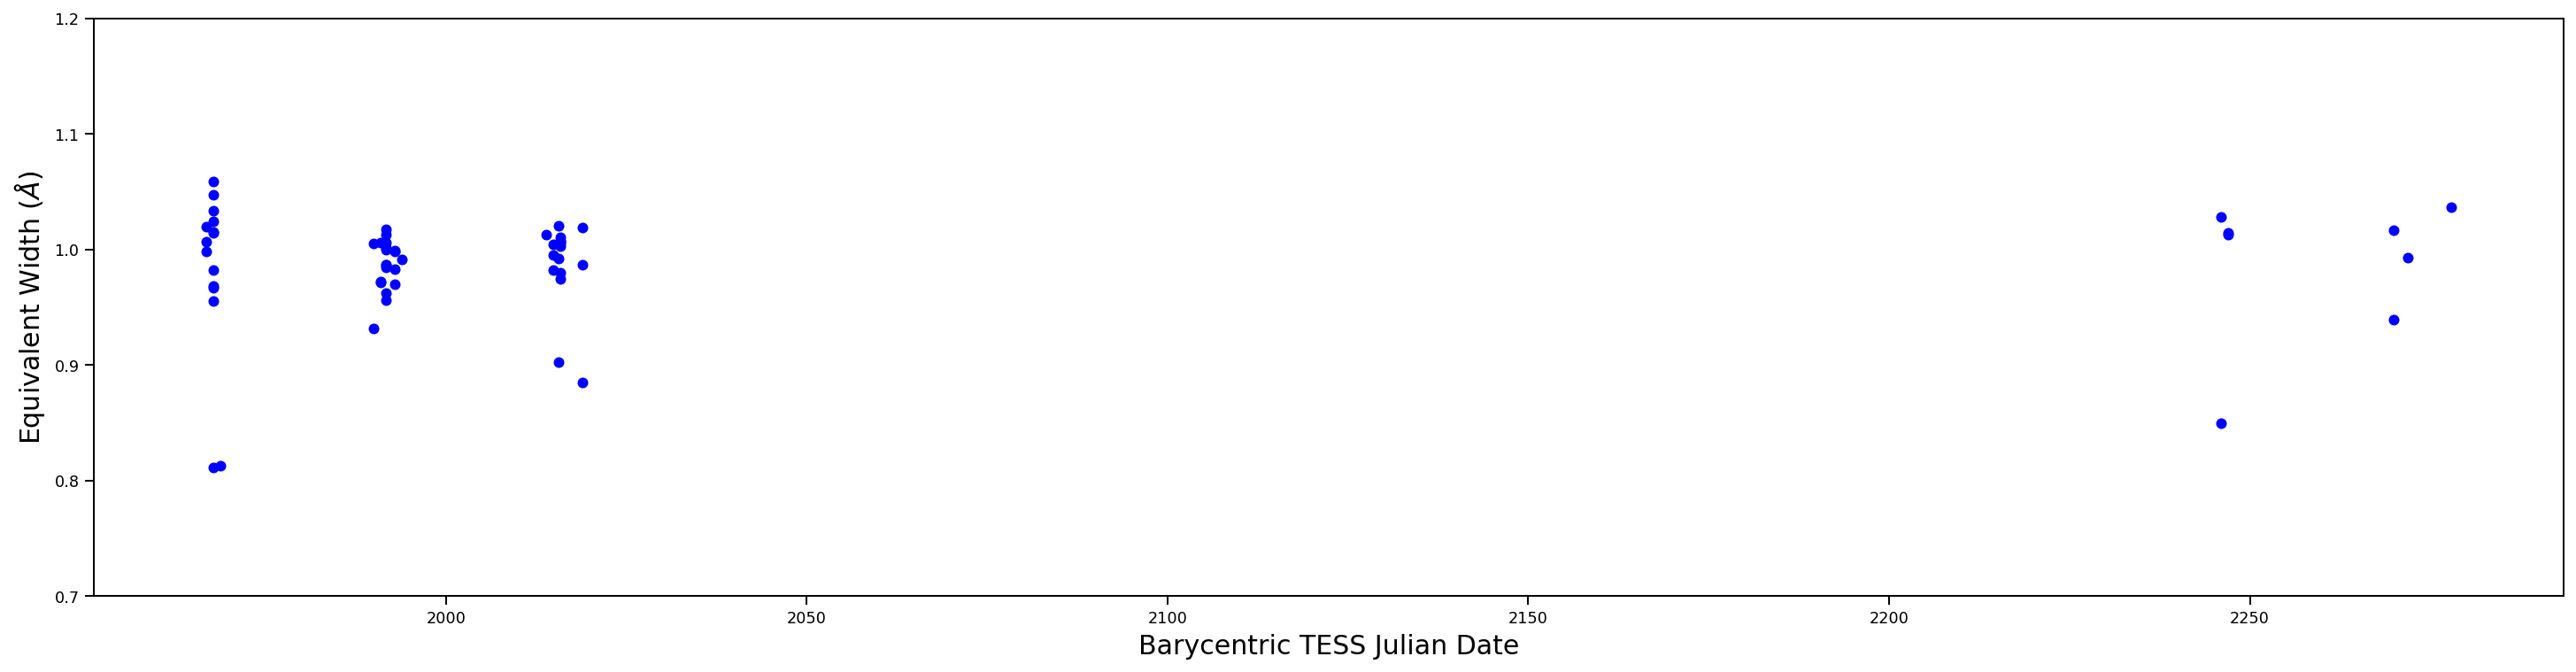

In [95]:
plt.figure(figsize=(25,6))
#plt.errorbar(df.btjd, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.btjd, df.ew/np.median(df.ew), 'bo', markersize=5)
plt.xlabel('Barycentric TESS Julian Date', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
plt.ylim(.7,1.2)

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

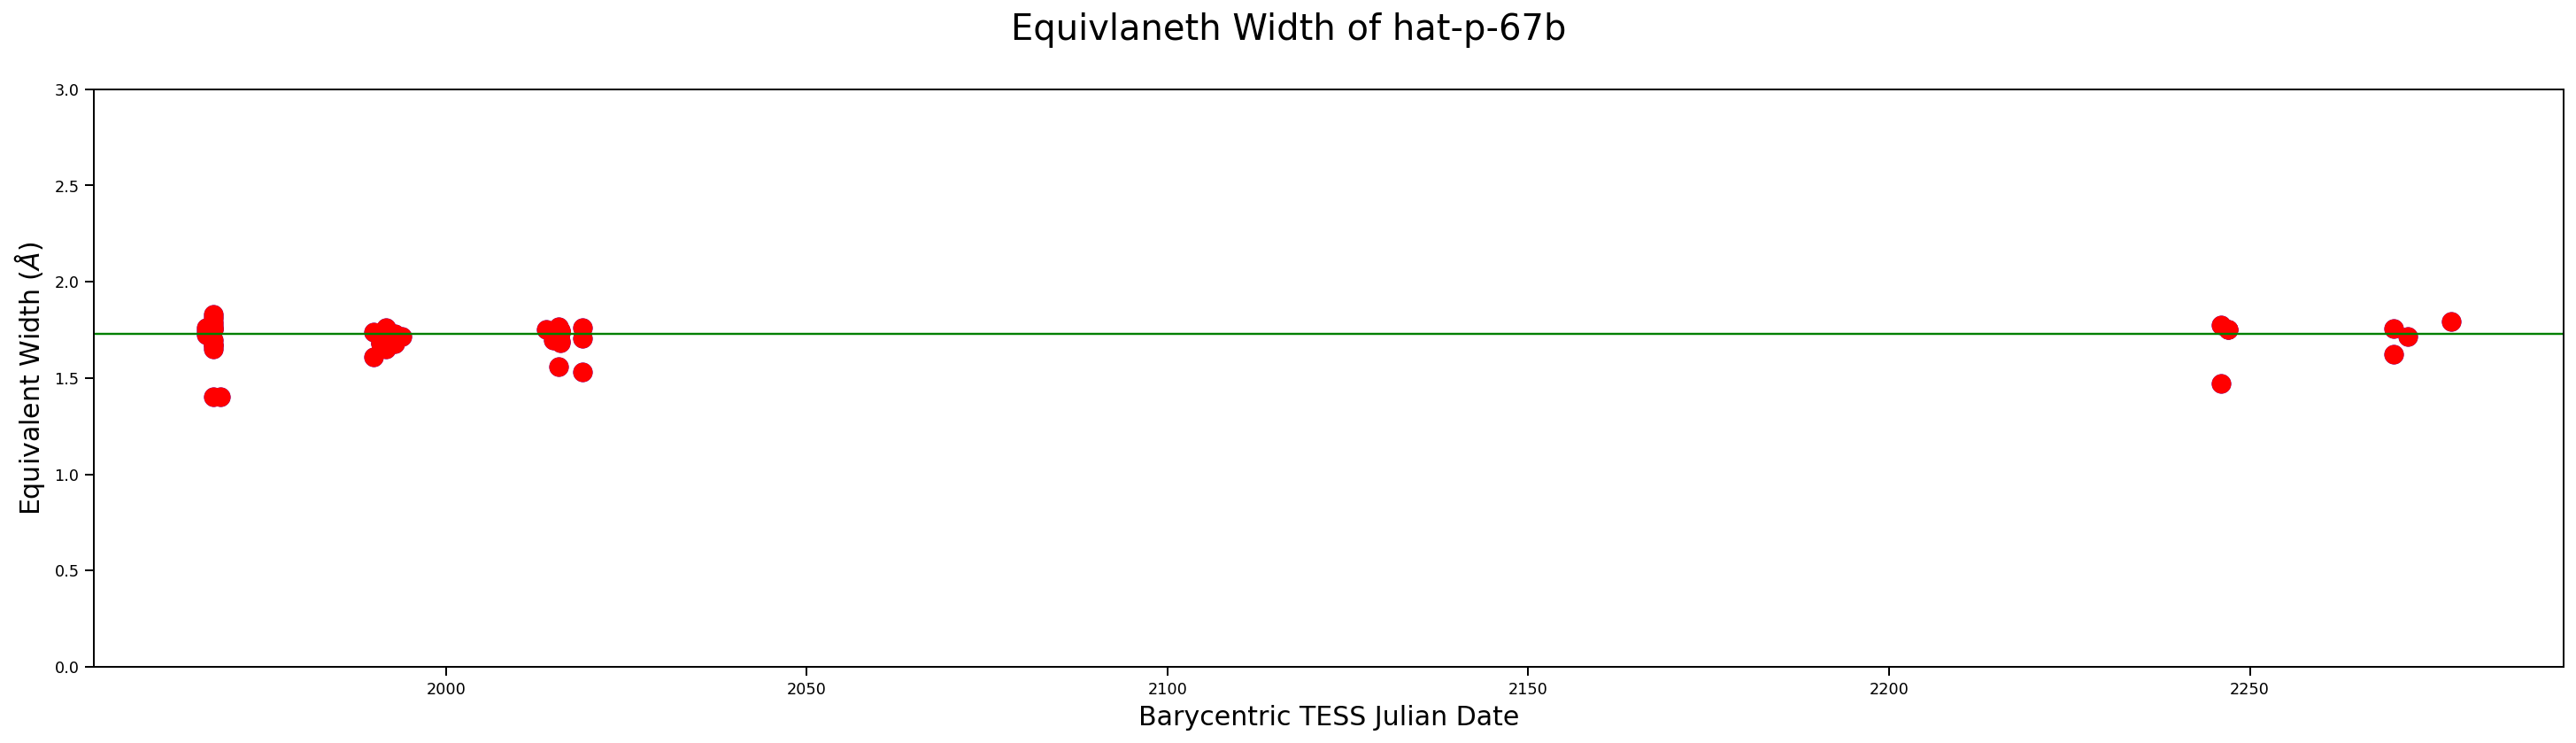

In [56]:
plt.figure(figsize=(25,6))
#plt.errorbar(df.btjd, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.btjd, df.ew, 'bo', markersize=10)
plt.plot(df.btjd[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time
plt.ylim(0,3)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Barycentric TESS Julian Date', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

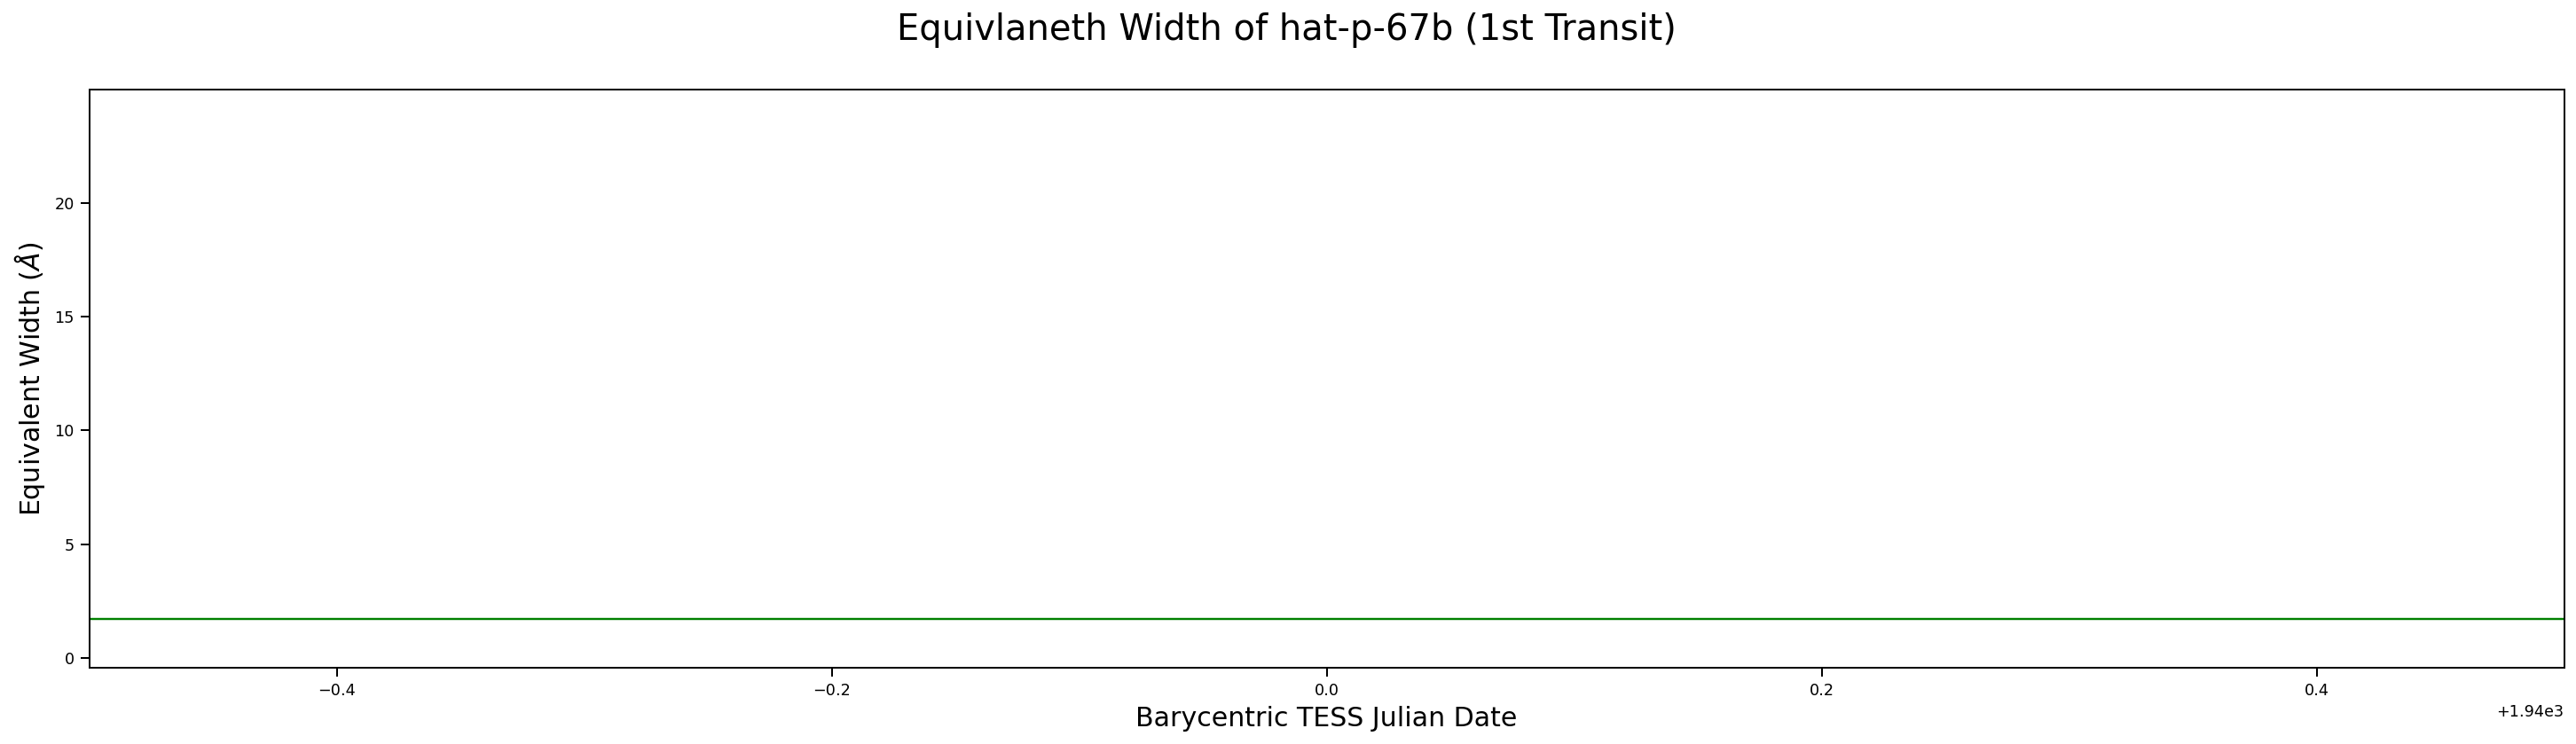

In [27]:
#1st in transit plot
plt.figure(figsize=(25,6))
plt.errorbar(df.btjd, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.btjd[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time
#plt.ylim(1.05,1.25)
plt.xlim(1939.5,1940.5)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name} (1st Transit)', fontsize=20)
plt.xlabel('Barycentric TESS Julian Date', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15) 
#plt.savefig(f'../figures/IN_TRANSIT_1_{target_name}.jpg')

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

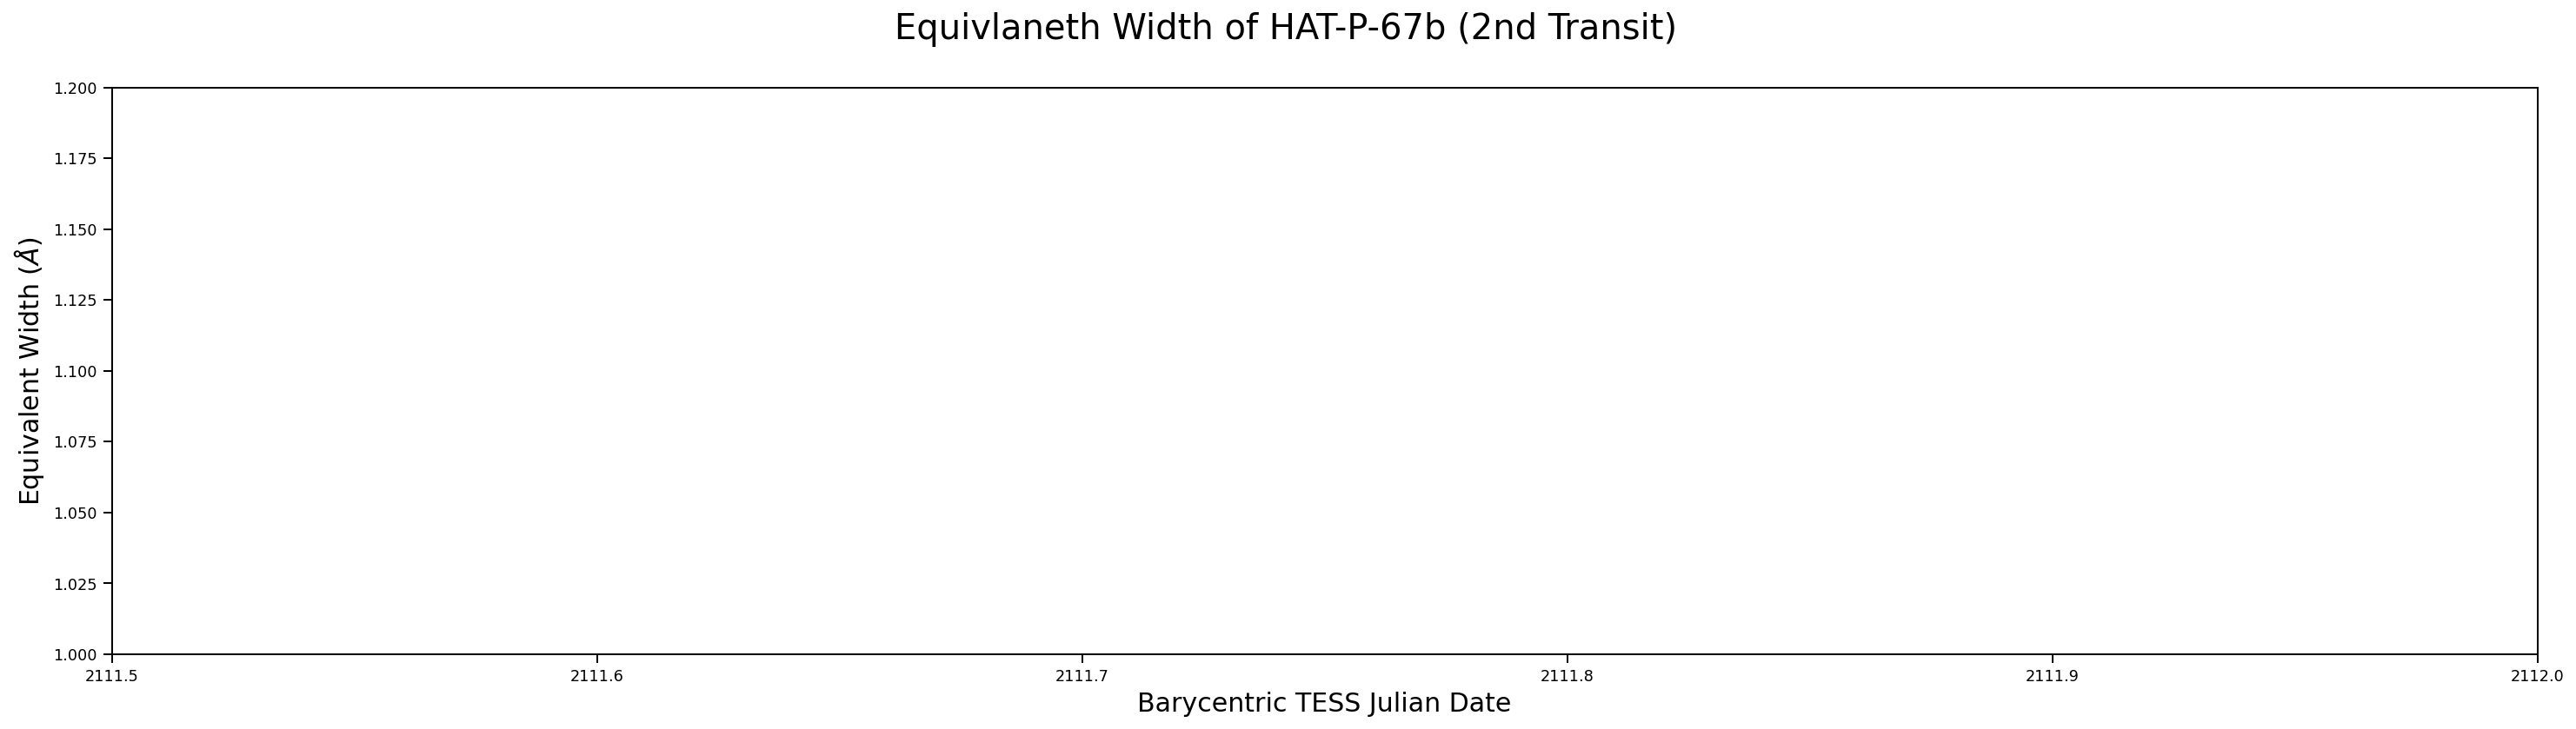

In [33]:
#2nd in transit plot
plt.figure(figsize=(25,6))
plt.errorbar(df.btjd, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.btjd[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time
plt.ylim(1.0,1.2)
plt.xlim(2111.5,2112)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name} (2nd Transit)', fontsize=20)
plt.xlabel('Barycentric TESS Julian Date', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15) 
#plt.savefig(f'../figures/IN_TRANSIT_2_{target_name}.jpg')

In [72]:
df.describe() #max less than orbital period, normalized less than 1

,ew,ew_unc,int_wv,jd,qidx,btjd,phase,normalized_phase
count,63.000000,63.000000,63.0,6.300000e+01,63.000000,63.000000,63.000000,63.000000
mean,2.476054,0.311703,8542.0,2.459027e+06,6900.079365,2027.364898,-0.116537,-0.024228
std,3.496068,1.176824,0.0,9.112962e+01,639.961473,91.129619,0.916645,0.190567
min,1.402266,0.014117,8542.0,2.458967e+06,6436.000000,1966.770274,-1.907170,-0.396493
25%,1.689761,0.019223,8542.0,2.458990e+06,6587.000000,1989.954787,-0.792279,-0.164712
50%,1.729410,0.022969,8542.0,2.458993e+06,6589.000000,1992.931733,-0.014557,-0.003026
75%,1.753992,0.049032,8542.0,2.459016e+06,6942.000000,2015.880899,0.096509,0.020064
max,19.653644,7.508860,8542.0,2.459278e+06,8486.000000,2277.935771,2.390478,0.496970


Text(0, 0.5, 'Equivalent Width ($\\AA$)')

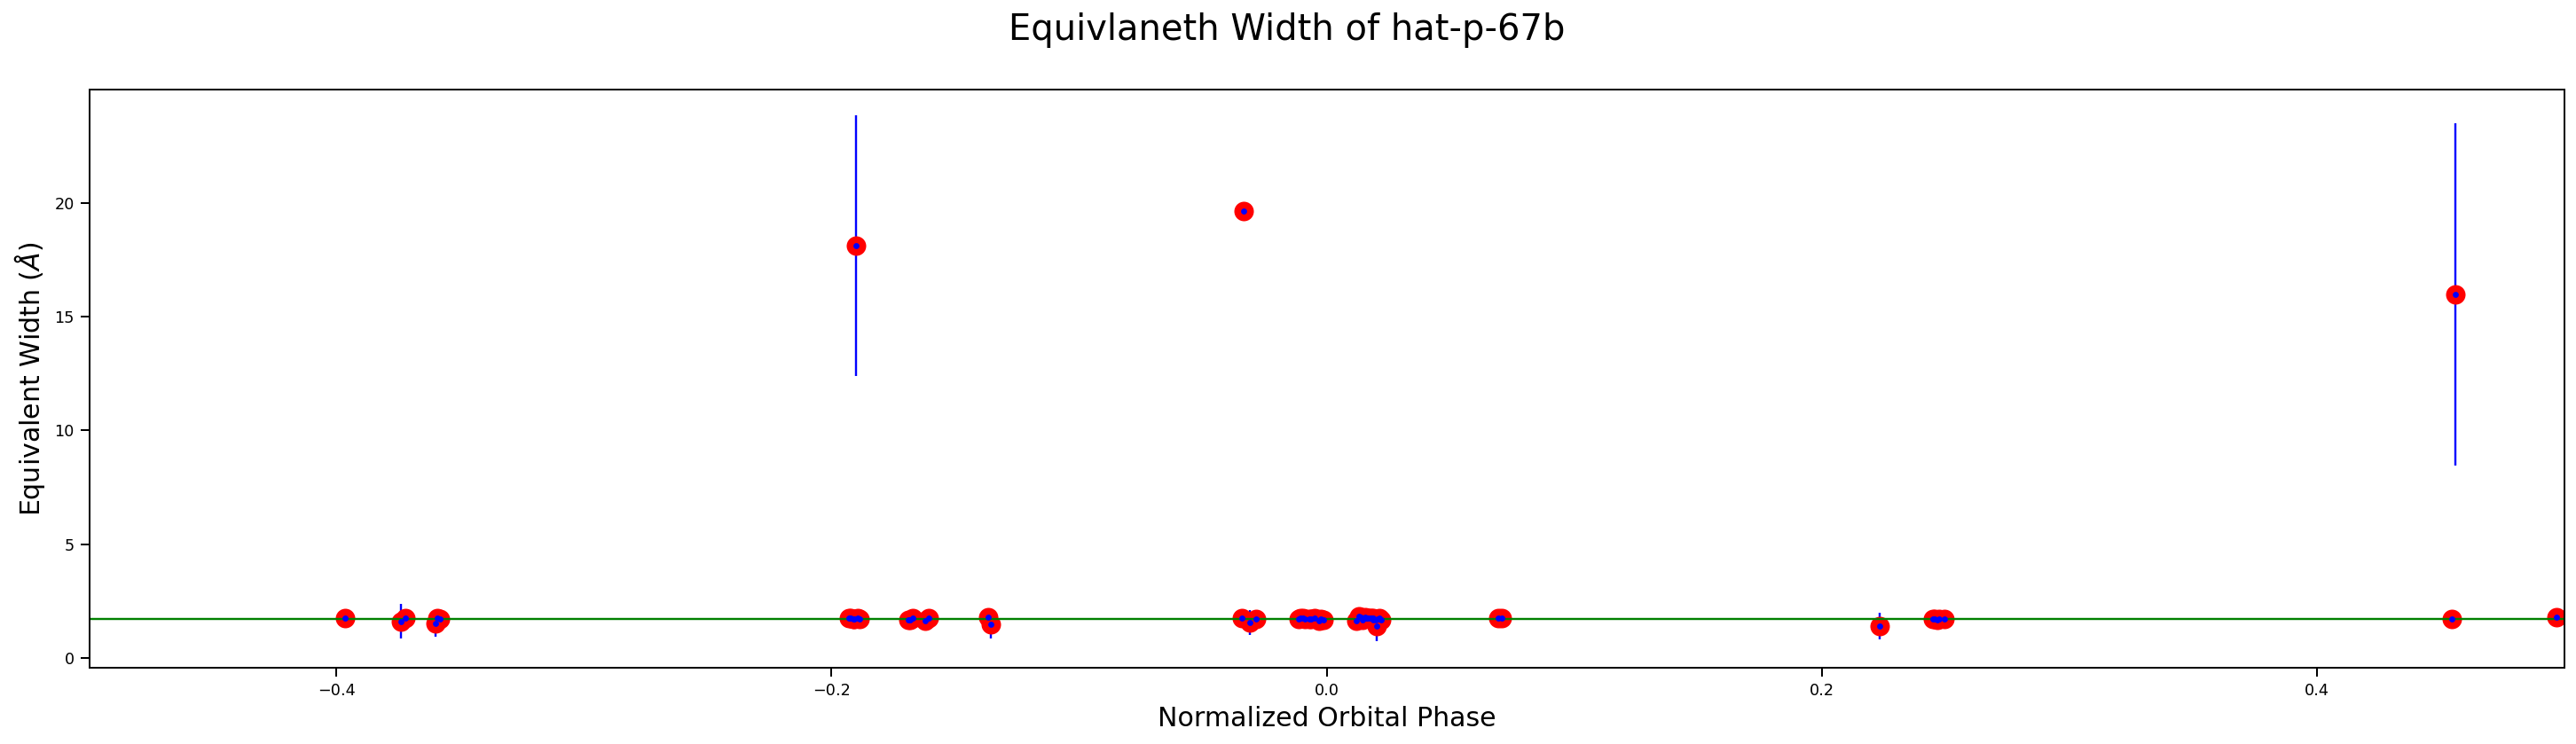

In [75]:
plt.figure(figsize=(25,6))

plt.errorbar(df.normalized_phase, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.normalized_phase[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.errorbar(df.normalized_phase-1, df.ew, yerr=df.ew_unc, fmt='b.')
#plt.plot(df.normalized_phase[in_transit_mask]-1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.errorbar(df.normalized_phase+1, df.ew, yerr=df.ew_unc, fmt='b.')
#plt.plot(df.normalized_phase[in_transit_mask]+1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.ylim(0.9,1.32)
plt.xlim(-0.5,0.5)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

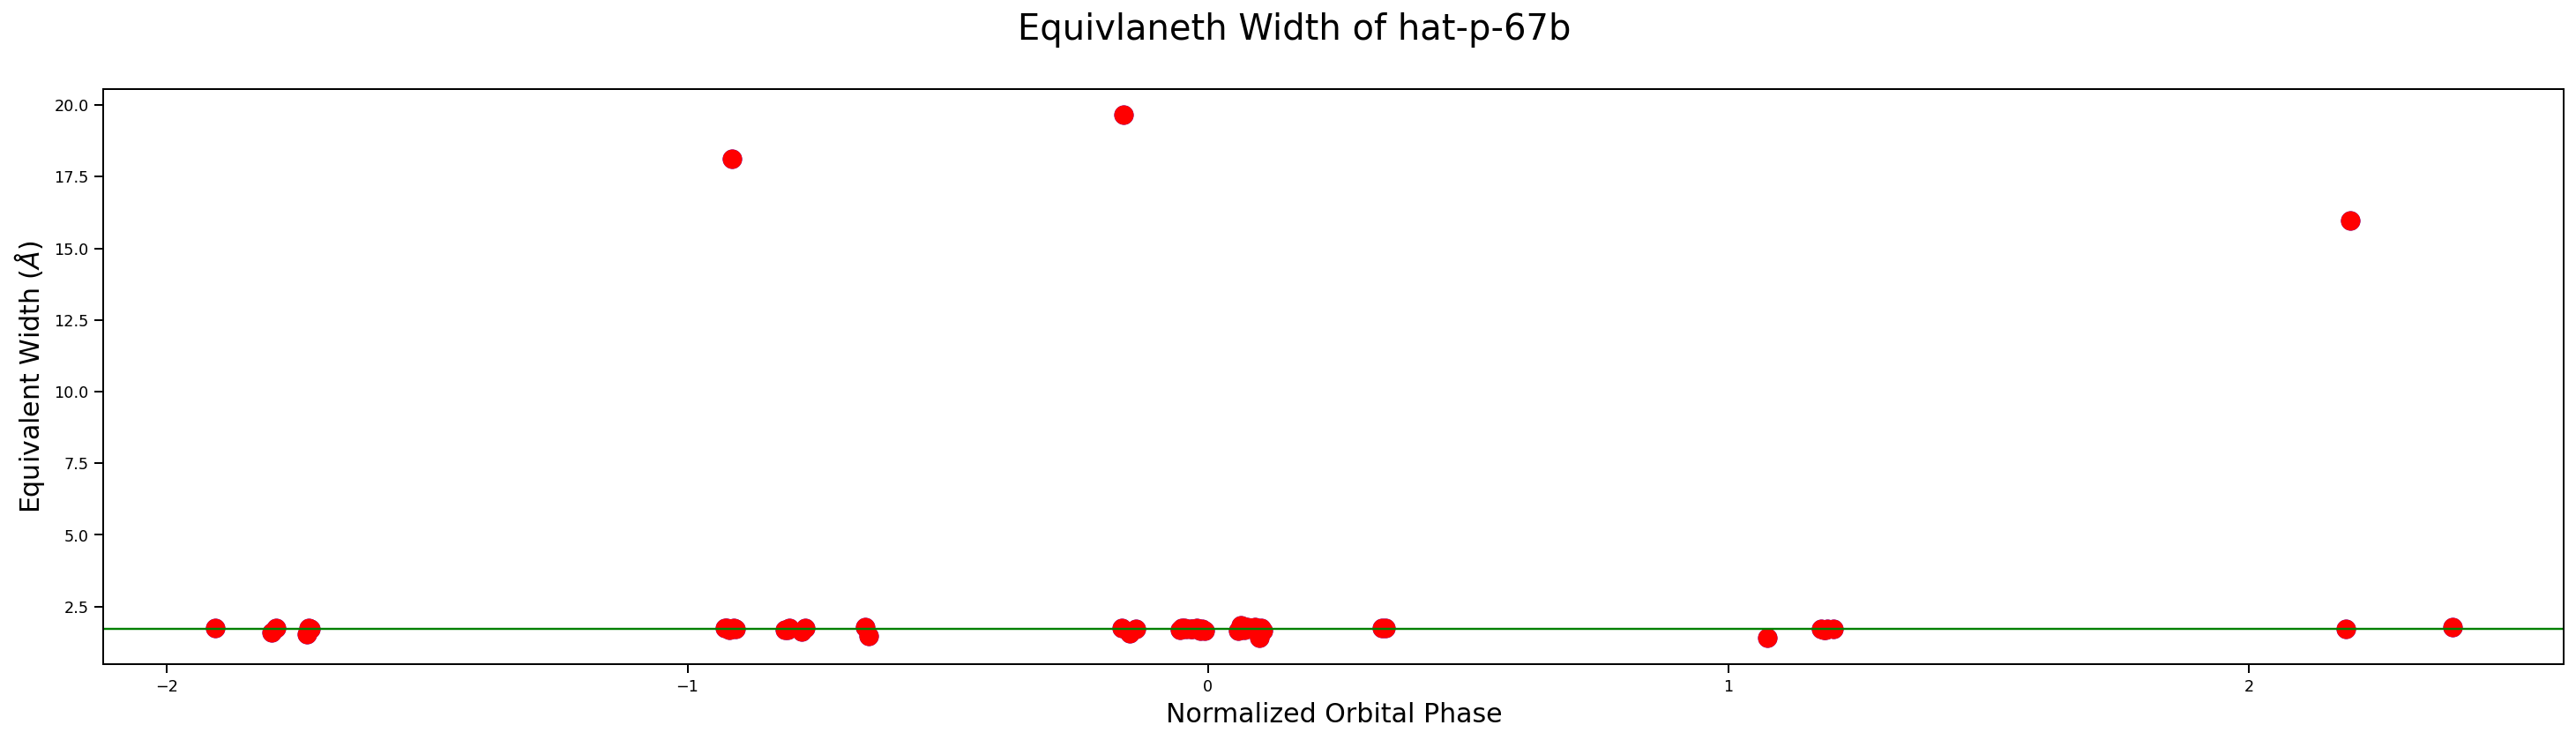

In [76]:
plt.figure(figsize=(25,6))

plt.plot(df.phase, df.ew, 'bo', markersize=10)
plt.plot(df.phase[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.plot(df.normalized_phase-1, df.ew, 'bo', markersize=10)
#plt.plot(df.normalized_phase[in_transit_mask]-1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.plot(df.normalized_phase+1, df.ew, 'bo', markersize=10)
#plt.plot(df.normalized_phase[in_transit_mask]+1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.ylim(0.9,1.32)
#plt.xlim(-2,2)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

Let's define a variable called 'shifted' in two steps.

In [77]:
second_half_mask = df.normalized_phase > 0.5
first_half_mask = ~second_half_mask

In [78]:
df['shifted']=df.normalized_phase
df.shifted[second_half_mask]=df.shifted[second_half_mask]-1
df.shifted[second_half_mask]

Series([], Name: shifted, dtype: float64)

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

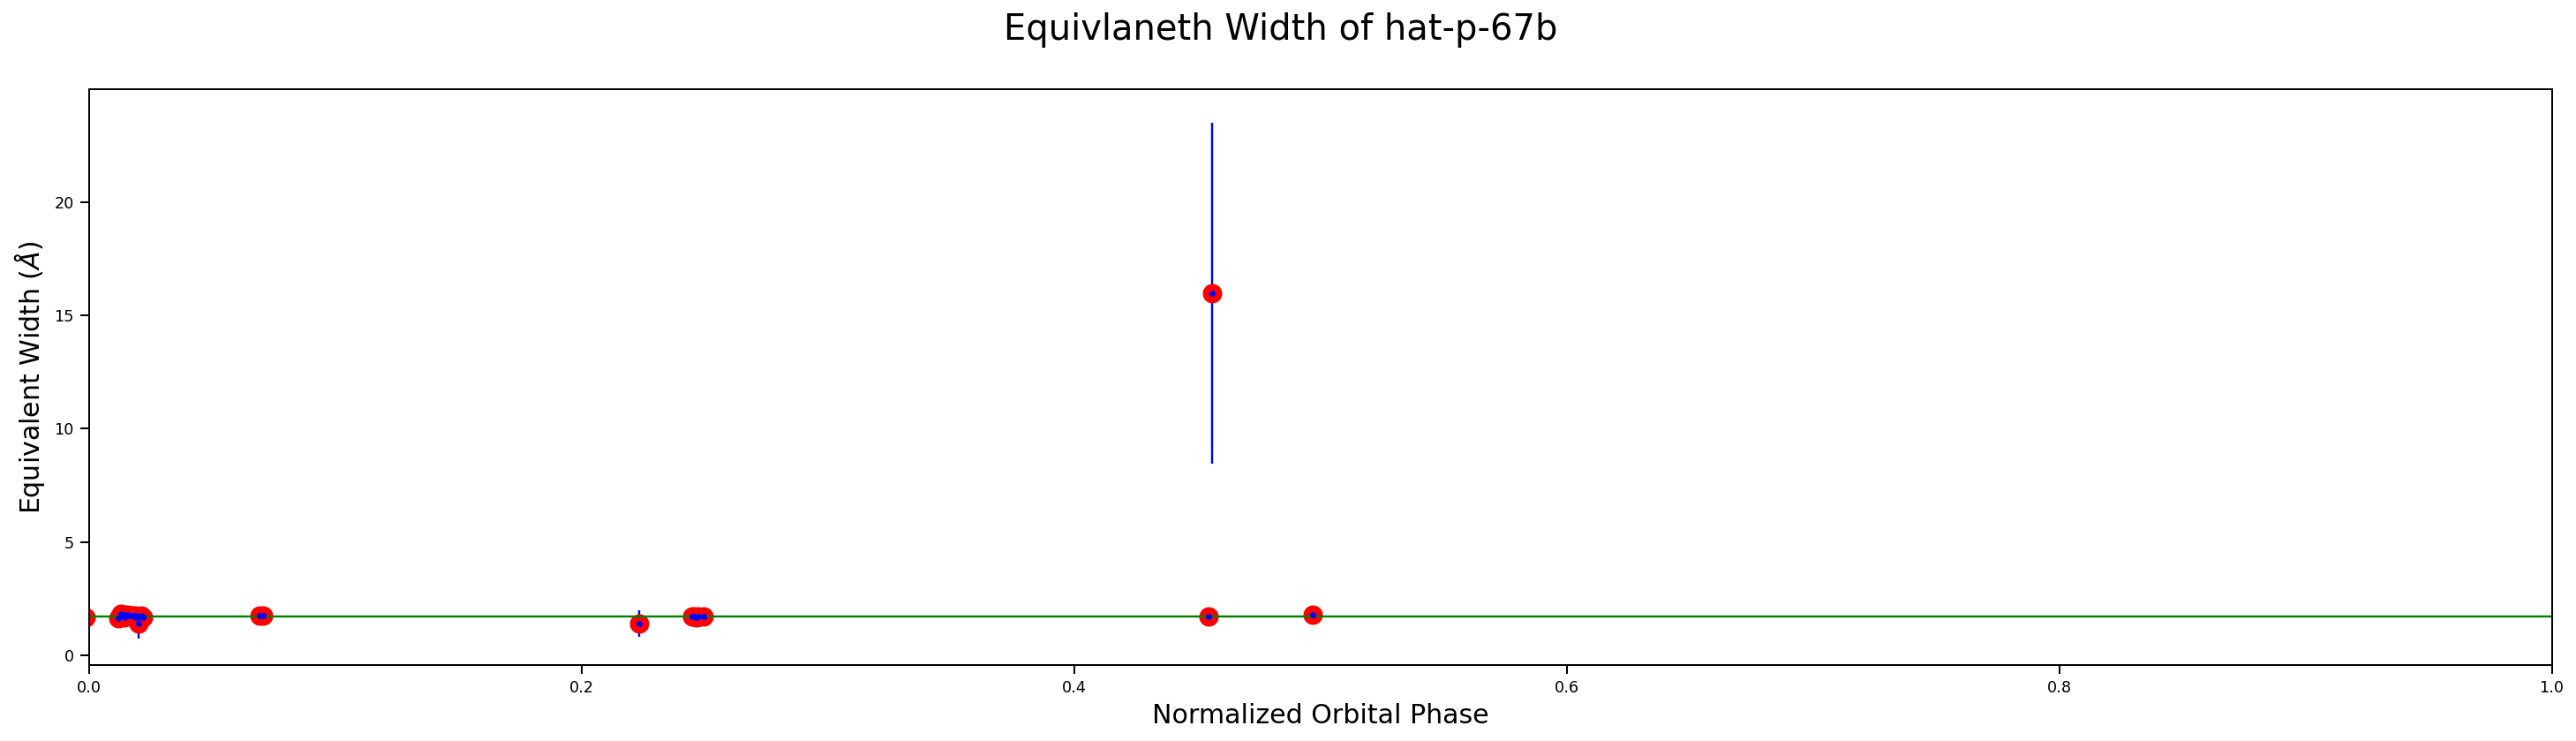

In [80]:
plt.figure(figsize=(25,6))
plt.errorbar(df.shifted, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.shifted[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time
#plt.ylim(0.9,1.32)
plt.xlim(0,1)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

# Light curve analysis with TESS

In [83]:
sr = lk.search_lightcurve(target_name)
lc_raw = sr[1].download()

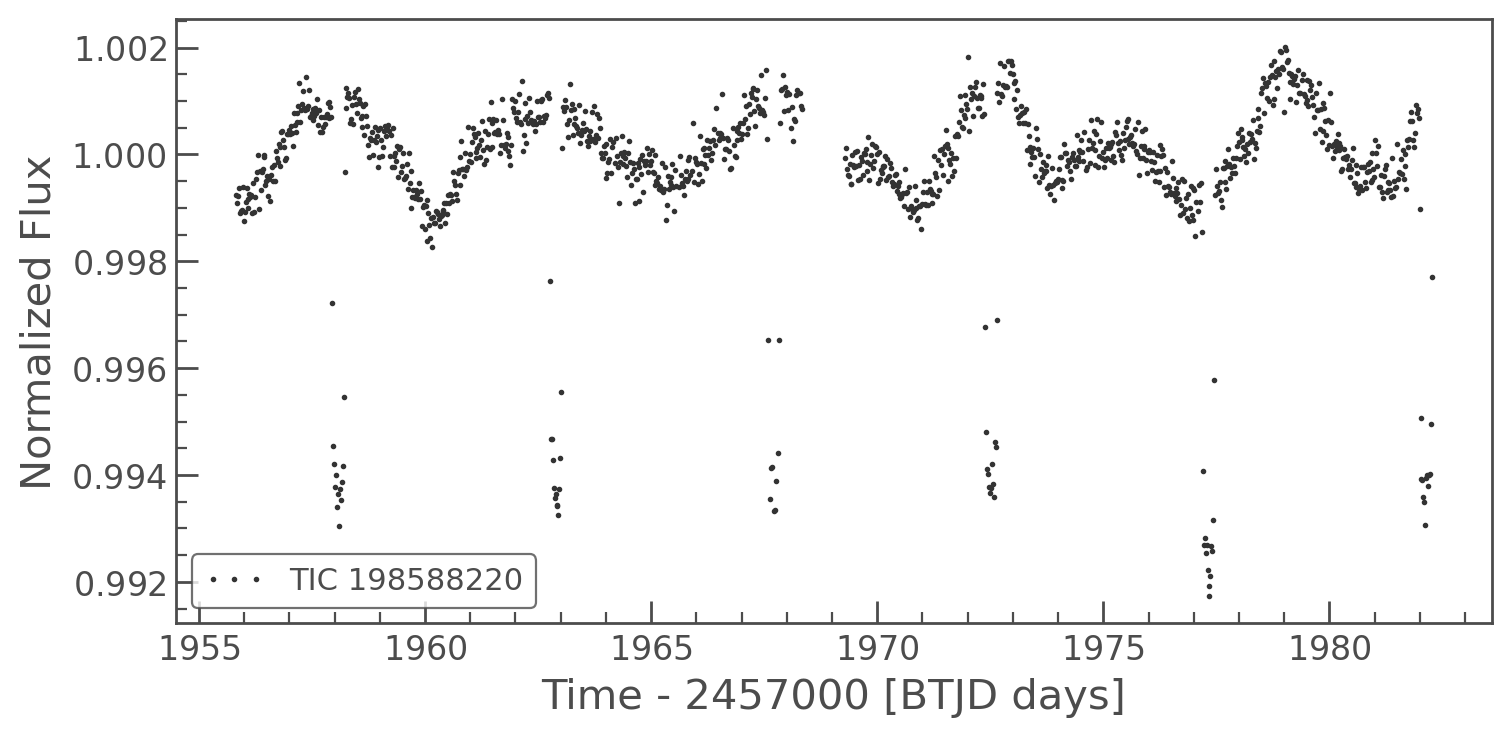

In [84]:
ax = lc_raw.normalize().plot(marker='.', linestyle='none')
#ax.set_ylim(0, 1.05)

(-1.0, 1.0)

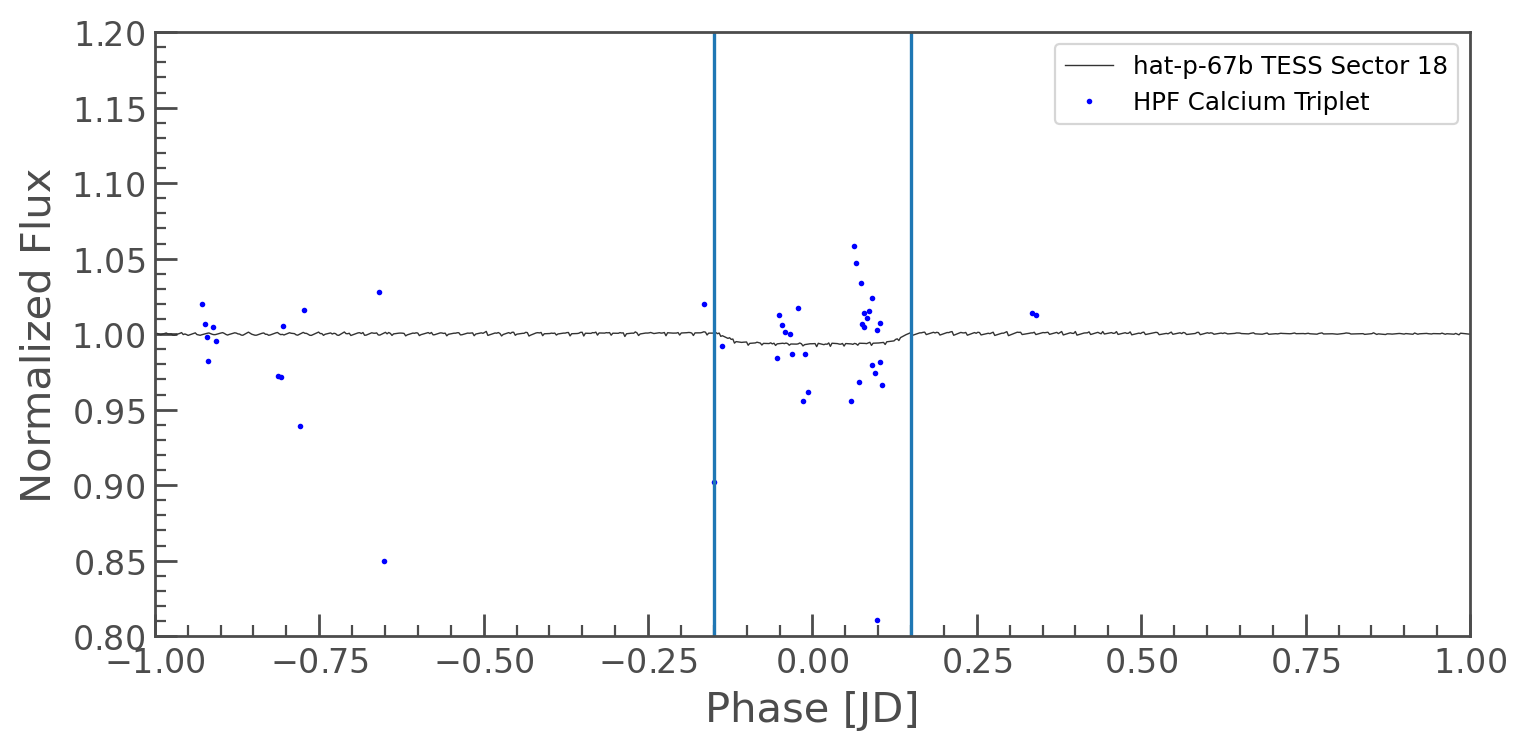

In [100]:
lc_folded = lc_raw.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()
ax = lc_folded.plot(label = target_name+' TESS Sector 18')
plt.plot(df.phase, df.ew/np.median(df.ew), 'bo', markersize=1, label = 'HPF Calcium Triplet') #median ignored outliers
plt.legend()
plt.ylim(.8,1.2)
plt.axvline(-0.15)
plt.axvline(0.15)
plt.xlim(-1,1)
#plt.savefig(f'../figures/TESS_EW_{target_name}_1.jpg')

# Exploring different exposure times in the same sector

In [41]:
sr = lk.search_lightcurve(target_name)
lc_raw = sr[0].download()

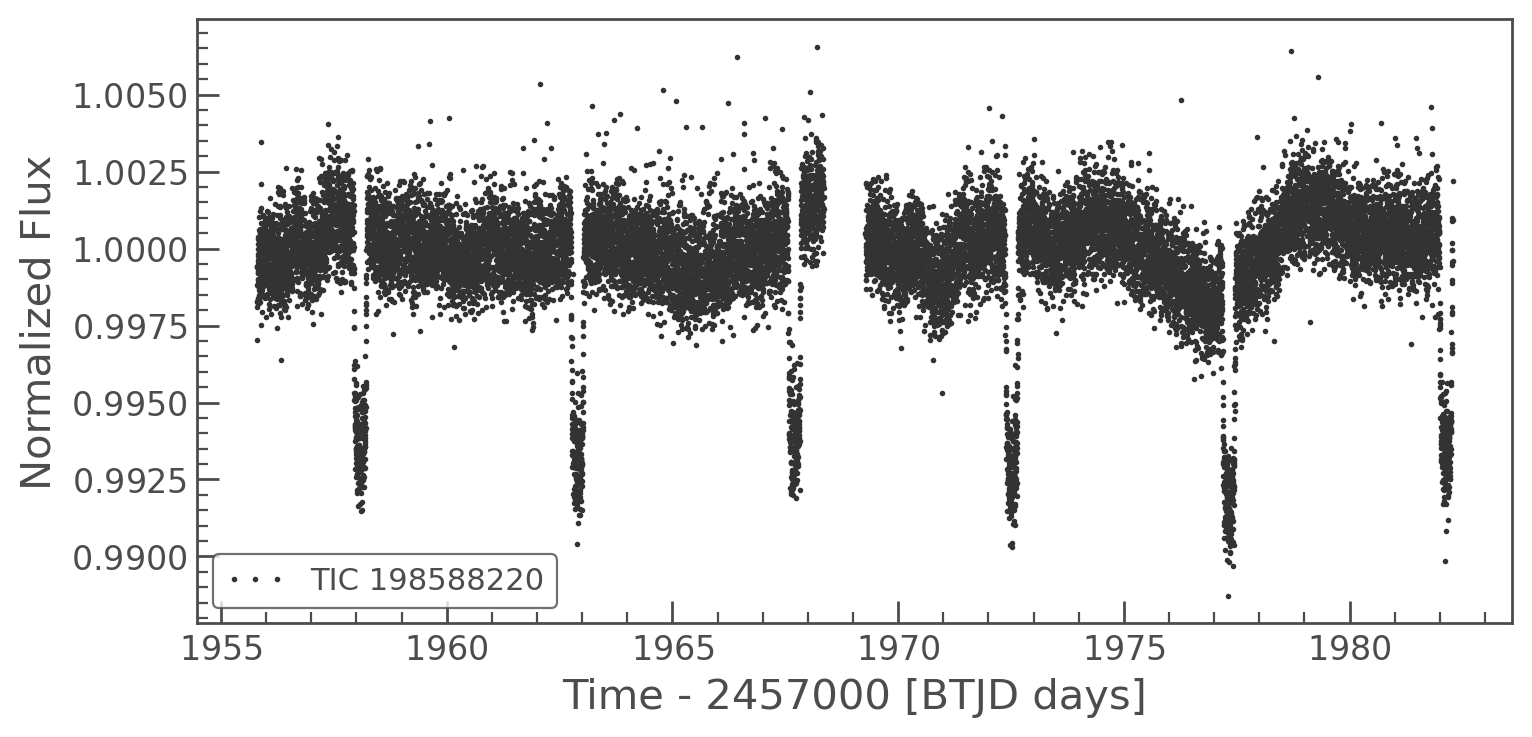

In [42]:
ax = lc_raw.normalize().plot(marker='.', linestyle='none')
#ax.set_ylim(0, 1.05)

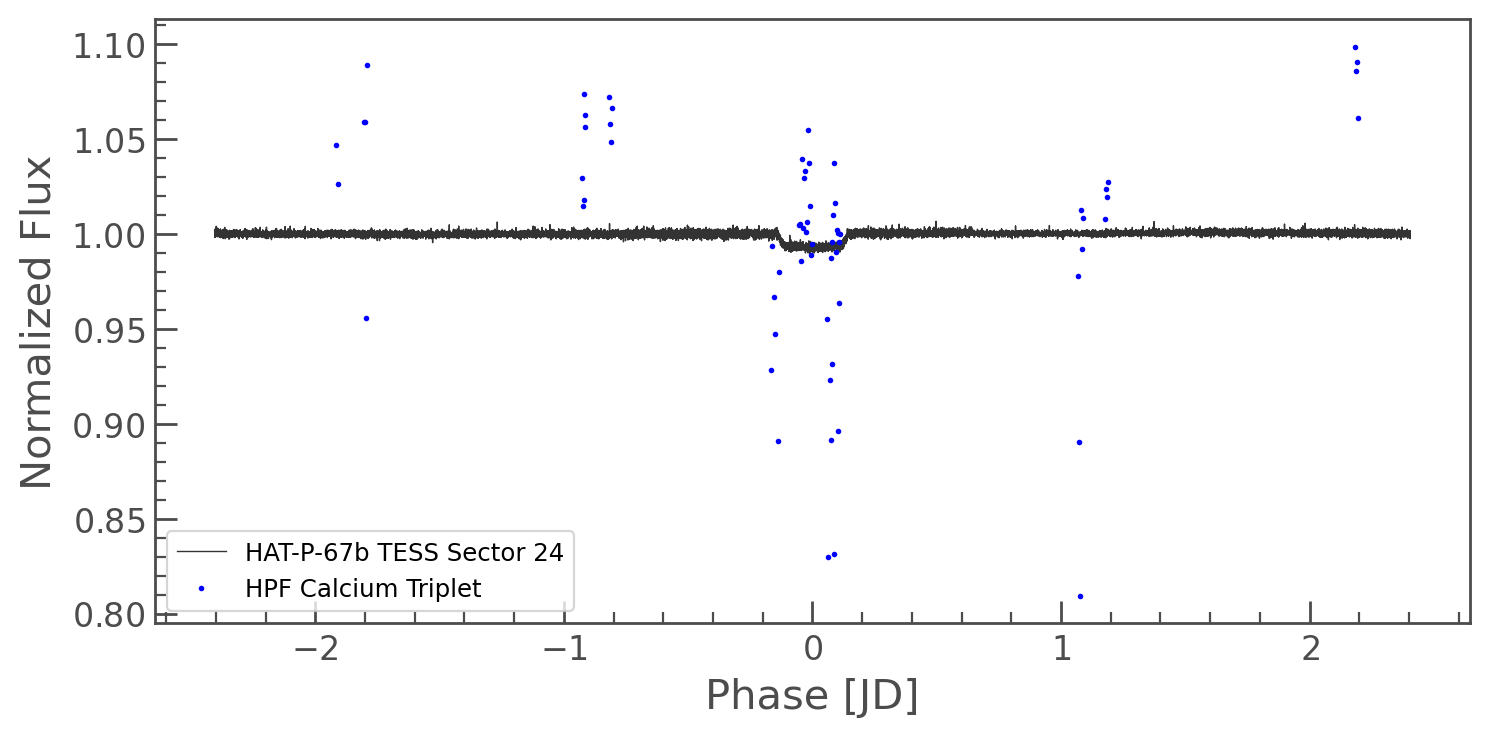

In [44]:
lc_folded = lc_raw.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()
ax = lc_folded.plot(label = target_name+' TESS Sector 24')
plt.plot(df.phase, df.ew/np.mean(df.ew), 'bo', markersize=1, label = 'HPF Calcium Triplet')
plt.legend()
#plt.savefig(f'../figures/TESS_EW_{target_name}_0.jpg')